**Aluno: Rafael Costa Mendes**

Link do repositório da professora com a descrição do trabalho: https://github.com/patriciapampanelli/mba-deeplearning-iad-006-2024-public

Link do meu repositório com os arquivos do Trabalho 1: https://github.com/rcm-poli-teste/mba-deeplearning-iad-006-2024-public

Também enviei um .zip via Moodle com meus arquivos.

Faz os imports das bibliotecas antes de começar os exercícios

In [ ]:
# Carregar o numpy
import numpy as np
# Carrega os módulos do sklearn
from sklearn.tree import DecisionTreeClassifier # Importa o DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Importa train_test_split para dividir os dados
from sklearn import metrics # Importa as bibliotecas para as métricas
from sklearn.datasets import load_digits # Importa os dígitos do MNIST
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree
# Importa o XGBoost
from xgboost import XGBClassifier
# Carrega o matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Carrega o Pickle
import pickle as pk
# Importa as bibliotecas para o cliente (Ex6 que vai chamar minha API Flask)
import requests
import json

**Exercício 1**

*   Carrega o dataset MNIST
*   Compara diversos métodos de split da árvore tipo Gini, Entropia,Log Loss para determinar a melhor.
*   Testa diversas profundidades (3,5,7,10,13,15,17,20,25,30,35,40) na criação da árvore para determinar a melhor.



In [ ]:
# Carrega os dígitos do dataset e imprime alguns dados para ver com o que estou trabalhando
mnist = load_digits()
print(f"Quantidade de imagens: {mnist.images.shape[0]}")
print(f"Shape das imagens: {mnist.images.shape}")
#print(f"Imprime a primeira imagem do dataset para ver:")
#plt.imshow(mnist.images[0],cmap='gray')
# Faz o split entre test e train
trainX,testX,trainY,testY = train_test_split(mnist.data, mnist.target, test_size=0.2)
# Instancia o objeto do Decision Tree básico, faz o fit e printa o score
parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'], # diferentes métodos de avaliação na criação da árvore
    'max_depth': [3,5,7,10,13,15,17,20,25,30,35,40] # testa diferentes profundidades de árvore
}
gridDecisionTreeBasica = GridSearchCV(DecisionTreeClassifier(),parametros, n_jobs=-1)
gridDecisionTreeBasica.fit(trainX,trainY)
print("---DecisionTreeClassifier básico, comparando gini, entropy e log_loss e diversas profundidades na criação da árvore --- ")
print(f"Melhor estimador: {gridDecisionTreeBasica.best_estimator_}")
print(f"Melhores parametros: {gridDecisionTreeBasica.best_params_}")
print(f"Melhor score: {gridDecisionTreeBasica.best_score_}")

Quantidade de imagens: 1797
Shape das imagens: (1797, 8, 8)
---DecisionTreeClassifier básico, comparando gini, entropy e log_loss e diversas profundidades na criação da árvore --- 
Melhor estimador: DecisionTreeClassifier(criterion='log_loss', max_depth=35)
Melhores parametros: {'criterion': 'log_loss', 'max_depth': 35}
Melhor score: 0.8614837398373985


**Exercício 2** - Criar modelos de árvores de ensemble. Métodos usados:

*   Random Forest
*   Gradient Boost
*   eXtreme Gradient Boosting. Neste algoritmo também foi utilizado o GridSearchCV para determina o melhor parâmetro entre vários passados.


In [ ]:
# Treina com o Random Forest
print("--- RandomForestClassifier --- ")
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(trainX,trainY)
scoreRandomForest = rf.score(testX,testY)
print(f"Score do random forest: {scoreRandomForest}")

# Treina com o Gradient Boosting (usando o sklearn)
print("--- GradientBoostingClassifier --- ")
gb = GradientBoostingClassifier()
gb.fit(trainX,trainY)
scoreGradientBoosting = gb.score(testX,testY)
print(f"Score do Gradient Boosting : {scoreGradientBoosting}")

# Treina com o XGBoost (eXtreme Gradient Boosting)
print("--- XGBClassifier (eXtreme Gradient Boosting) --- ")
XGparametros = {
            'max_depth': [3,5,7,10,13,15,17,20,25,30,35,40],
            'learning_rate': [0.1,0.2,0.3,0.5,0.7,1],
            'n_estimators': [1,10,50,100]
        }

xgb = GridSearchCV(XGBClassifier(),XGparametros)
xgb.fit(trainX,trainY)
print(f"Score do Gradient Boosting : {xgb.best_score_}")
print(f"Melhores parametros: {xgb.best_params_}")

--- RandomForestClassifier --- 
Score do random forest: 0.9888888888888889
--- GradientBoostingClassifier --- 
Score do Gradient Boosting : 0.9666666666666667
--- XGBClassifier (eXtreme Gradient Boosting) --- 
Score do Gradient Boosting : 0.9554563492063493
Melhores parametros: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}


**Exercício 3** - Visualizar a árvore e determina o melhor método de impureza.
Neste exercício utilizei o Random Forest dado que ele obteve o melhor score no exerício 2.

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=800)
# Versão em texto puro da árvore
#arvoreModoTexto = tree.export_text(rf.estimators_[0])
#print(arvoreModoTexto)
# Versão em gráfico da árvore
#tree.plot_tree(rf.estimators_[0],
#               feature_names = mnist.feature_names,
#               class_names = mnist.target_names,
#               filled = True)

tree.plot_tree(rf.estimators_[0], # Imprime a primeira árvore
               filled = True)
plt.show()

**Exercício 4 e 5 - Preparação**

Os Exercícios 4 e 5 consistem em gerar um Docker file com as bibliotecas de dependência e uma API flask. Estes dois passos serão feitos fora deste notebook e estão no meu diretório do GitHub.

Porém, antes de fazê-los, preciso fazer um export do modelo treinado via Pickle para que possa ser exposto via API Flask depois.
O modelo escolhido foi o Random Forest dado que ele obteve o melhor score.

In [ ]:
# Faz o dump do objeto "rf" (modelo que treinei com Random Forest) em um arquivo chamado rf-treinado.pkl
with open('rf-treinado.pkl', 'wb') as pickle_file:
    pk.dump(rf, pickle_file)

Este passo irá salvar o arquivo pkl no próprio drive temporário da máquina que está roando o Colab. Depois disso, fiz o download manual do pkl e coloquei no Docker para poder ser carregado e chamado pela API Flask.

**Exercícios 4 e 5 - Execução:**

O código está no Github, porém deixei os comentário de como fiz aqui no Notebook:

Passos para fazer os exercícios 4 e 5:

Docker:

Fiz as seguintes alterações no Dockerfile da professora:
*   Alterei de FastAPI para Flask
*   Adicionei o gunicorn
*   Alterei a imagem base para o python:3.11-slim que é uma versão mais nova do que o 3.9 que estava no arquivo original.

Fiz as seguintes alterações no requirements.txt da professora:
*   Adicionei o gunicorn
*   Coloquei a versão 1.3.2 do sklearn. Uma observação importante é que o sklearn do Colab estava na versão 1.3.2 que usei para treinar o modelo, porém o da imagem do Docker estava em uma versão mais nova. Isto causou um erro quando tentei fazer a predição com o arquivo importado do Pickle. Após um tempo fazendo troubleshooting, descobri que o erro estava na versão.
*   Adicionei também versões específicas do NumPy (1.26.4), Pandas (2.2.1) e Flask (3.0.3) para bater com o ambiente que usei para desenvolvimento.

Flask:
Fiz o arquivo main.py para com a API com os seguintes métodos:

*   /echo : retorna o que foi enviado. Usado apenas para validar meu serviço básico.
*   /predict: Usa como entrada um número do dataset de treinamento e retorna o número previsto. Usar como input um número do dataset de treinamento não é ideal, implementei apenas para validar a API, import do modelo e predição.
*   /predictV2: Este é o método em produção versão final. Ele recebe uma imagem codificada em base64, chama o modelo e retorna o número previsto.









**Exercício 6** - Cliente para chamar minha API:

Fiz um index.html como página de entrada do meu servidor Flask com javascript onde o usuário pode entrar o host, a porta e selecionar a imagem (com dígitos de 0 a 9) para predição.

O javascript que fiz altera dinamicamente a imagem selecionada no combobox e envia para o servidor codificada em base64 para predição.

Fiz cada imagem 8x8 no Paint desenhando o dígito com o mouse e salvei no servidor Flask na pasta para conteúdo estático ("/static").

Utilizei o modelo do RandomForest com score de 98.05% (maior score entre os modelos testados).

Screenshot da tela final com o resultado do número previsto:

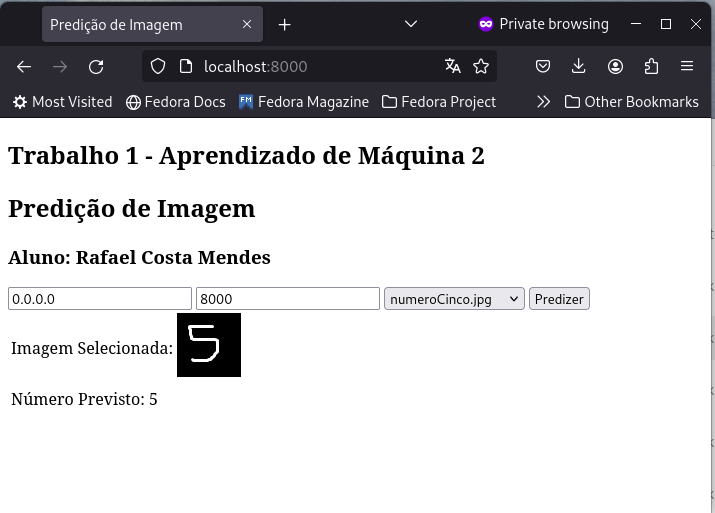

Esta screenshot mostra o modelo final rodando em um Docker na minha máquina servindo a API em Flask e fazendo a predição corretamente com um modelo de Random Forest.